# STOCHASTIC OSCILLATOR & MACD INDICATOR <br> FOR WDC STOCK PRICE ACQUISITION


1. HGST - March 2012
2. Arkeia Software - January 2013
3. STEC - September 2013
4. Virident - October 2013
5. Amplidata - March 2015
6. SanDisk - May 2016
7. Upthere - August 2017
8. Tegile - September 2017

## **Stochastic Oscillator Engine**

In [28]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from datetime import datetime
from mpl_finance import candlestick_ohlc
from matplotlib import pylab
from pylab import *
%matplotlib inline

In [29]:
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [30]:
def get_high(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['High']

In [31]:
def get_low(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Low']

In [32]:
def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

In [33]:
df0 = pd.DataFrame(get_stock('WDC', '12/31/1978', '12/11/2025'))

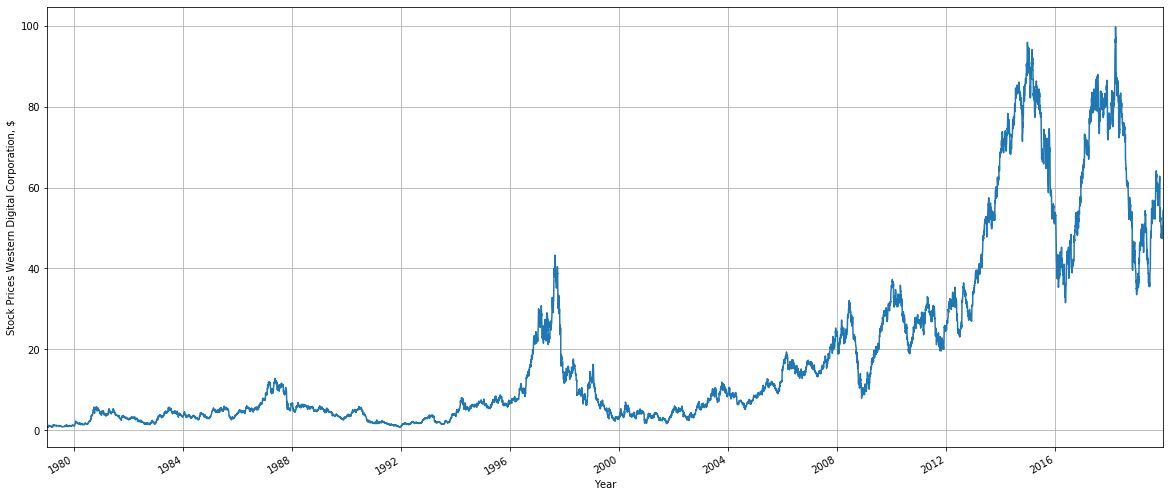

In [34]:
pylab.rcParams['figure.figsize'] = (20, 9)  
df0["Adj Close"].plot(grid = True)
plt.xlabel('Year')
plt.ylabel('Stock Prices Western Digital Corporation, $')
plt.show()

## **WDC Acquire Hitachi (HGST) on March 2012**<br>will be plot 7 months

In [35]:
df = pd.DataFrame(get_stock('WDC', '11/1/2011', '6/30/2012'))
df['High'] = get_high('WDC', '11/1/2011', '6/30/2012')
df['Low'] = get_low('WDC', '11/1/2011', '6/30/2012')

In [36]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [37]:
#save hitachi
d1 = df
d1_high = df['High']
d1_low = df['Low']
d1_k = df['%K']
d1_d = df['%D']

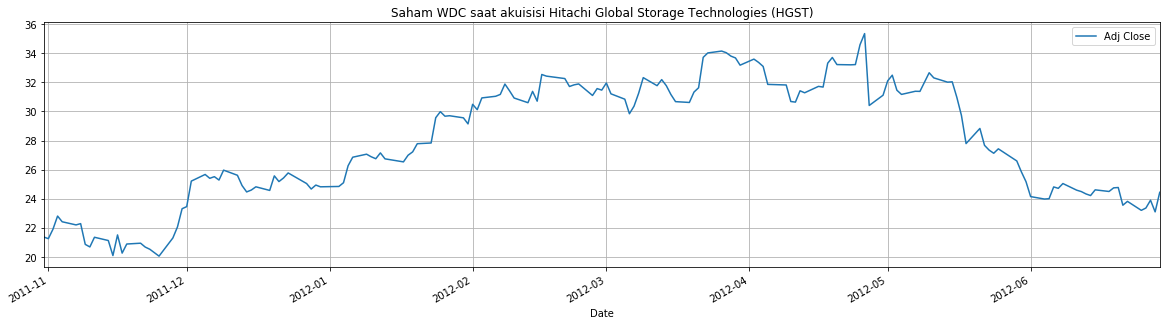

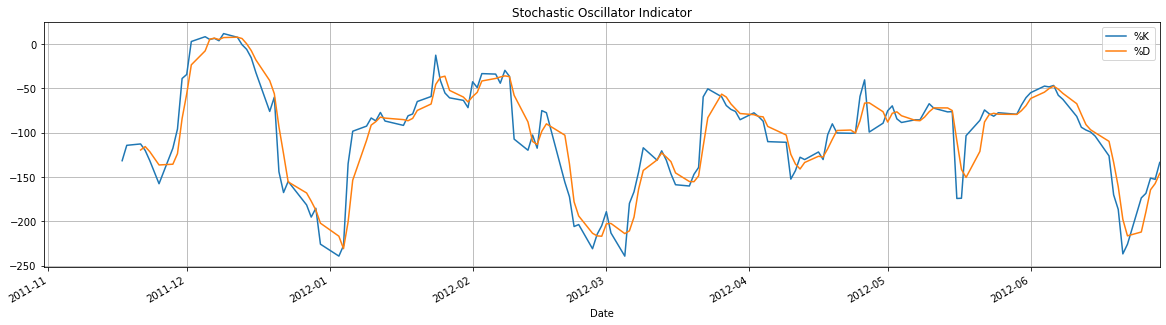

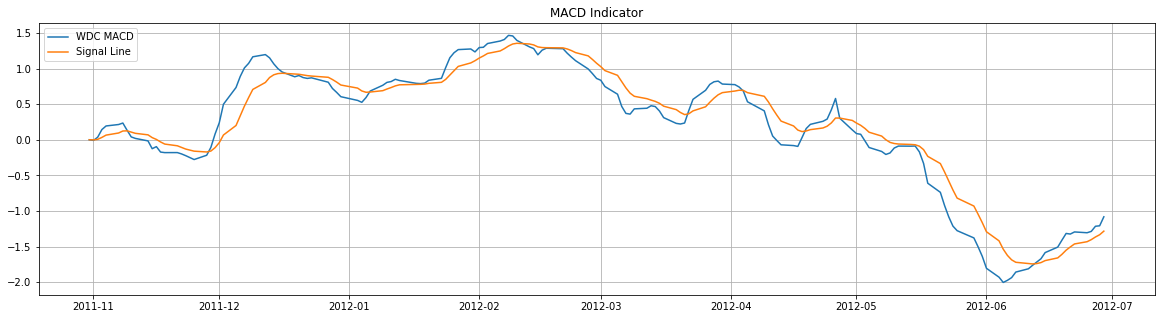

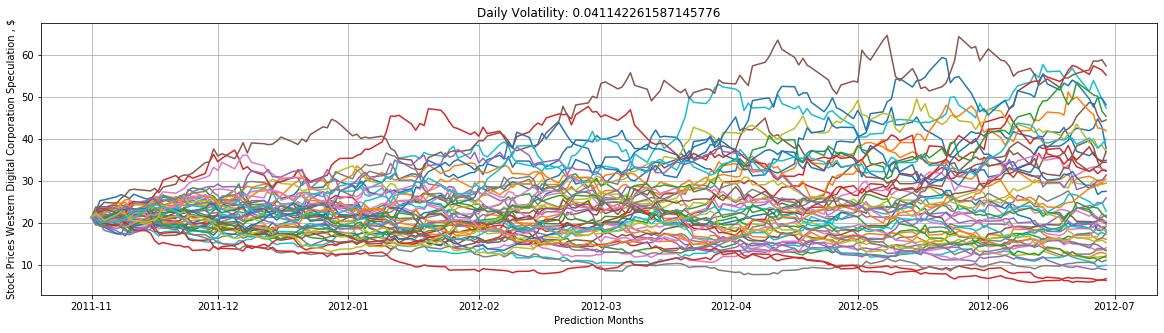

In [38]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi Hitachi Global Storage Technologies (HGST)')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()
plt.show()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2011-11-01'
pred_end_date = '2012-07-01'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '11/1/2011'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC Acquire Arkeia Software on January 2013**<br>will be plot 7 months

In [39]:
df = pd.DataFrame(get_stock('WDC', '9/1/2012', '4/30/2013'))
df['High'] = get_high('WDC', '9/1/2012', '4/30/2013')
df['Low'] = get_low('WDC', '9/1/2012', '4/30/2013')

In [40]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [41]:
d2 = df
d2_high = df['High']
d2_low = df['Low']
d2_k = df['%K']
d2_d = df['%D']

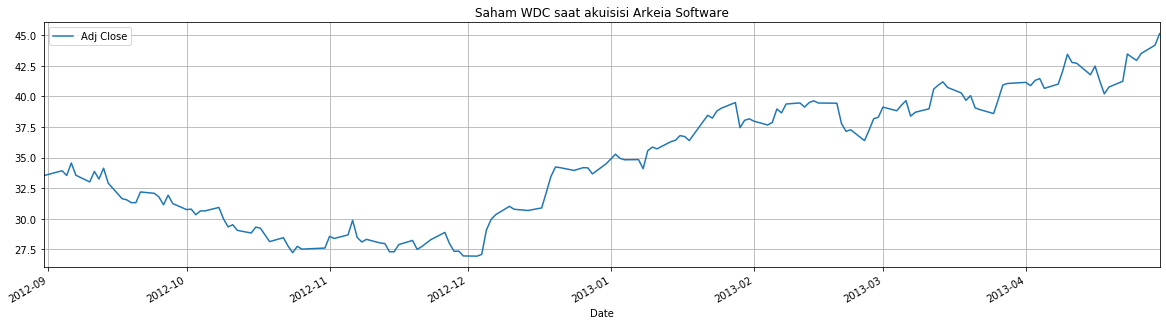

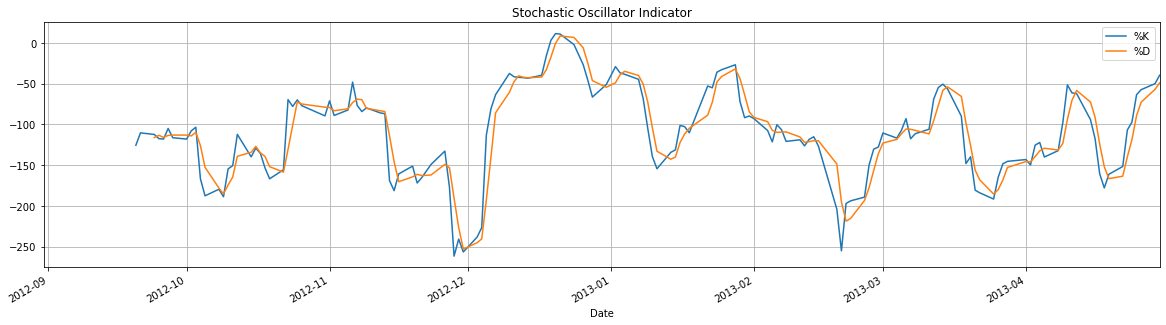

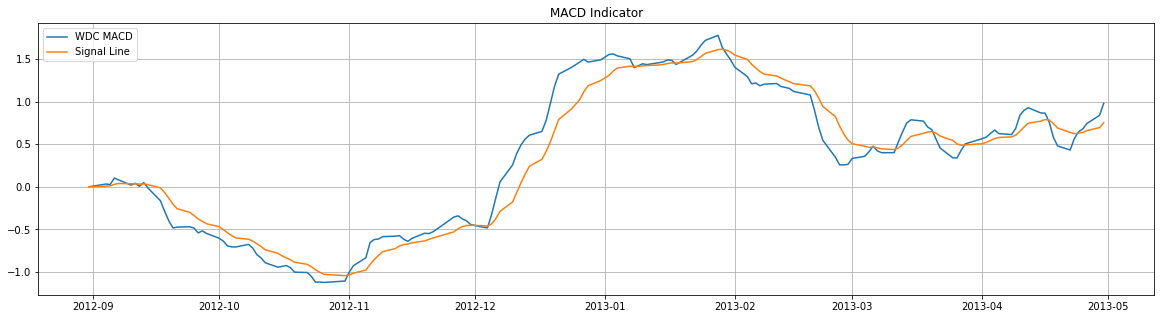

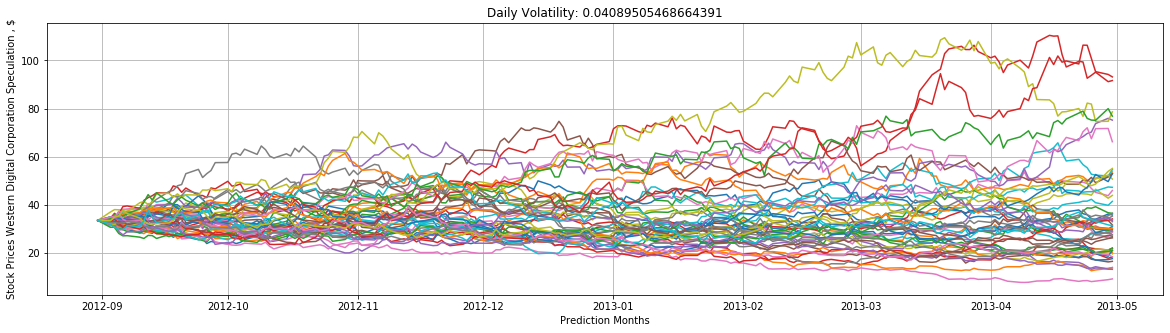

In [42]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi Arkeia Software')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2012-09-01'
pred_end_date = '2013-04-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '09/1/2012'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC -> HGST Acquire Stec on September 2013**<br>will be plot 7 months

In [43]:
df = pd.DataFrame(get_stock('WDC', '5/1/2013', '12/30/2013'))
df['High'] = get_high('WDC', '5/1/2013', '12/30/2013')
df['Low'] = get_low('WDC', '5/1/2013', '12/30/2013')

In [44]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [45]:
d3 = df
d3_high = df['High']
d3_low = df['Low']
d3_k = df['%K']
d3_d = df['%D']

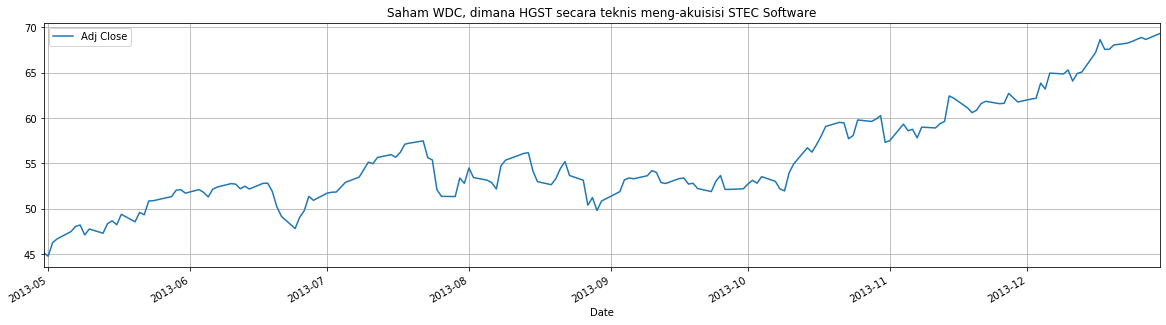

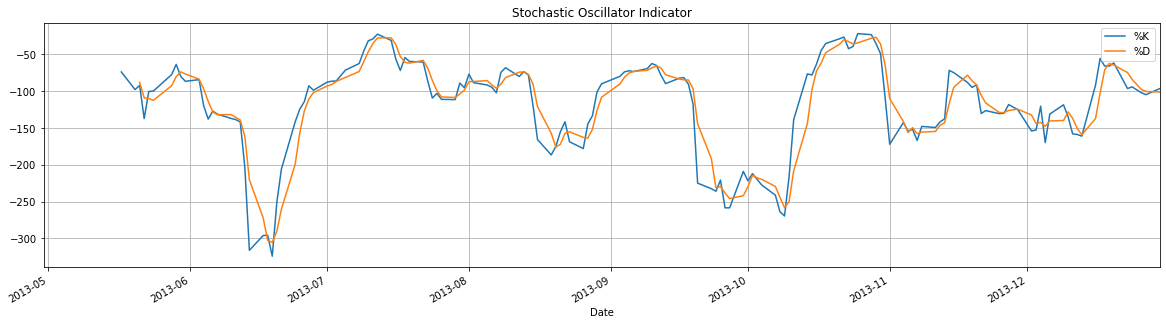

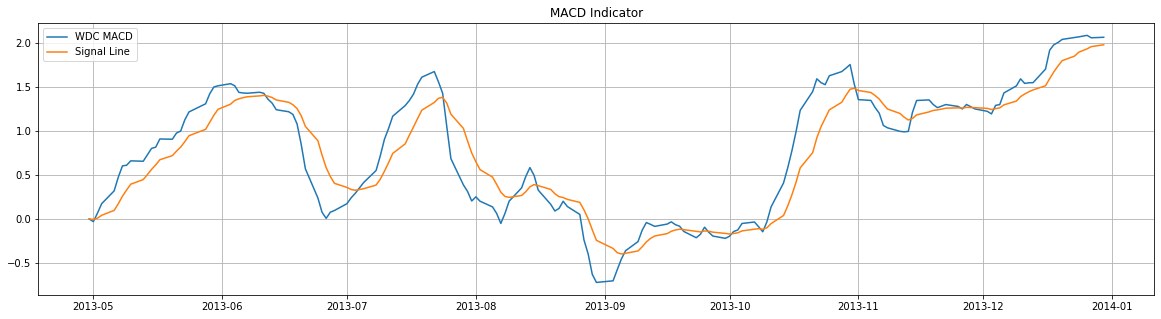

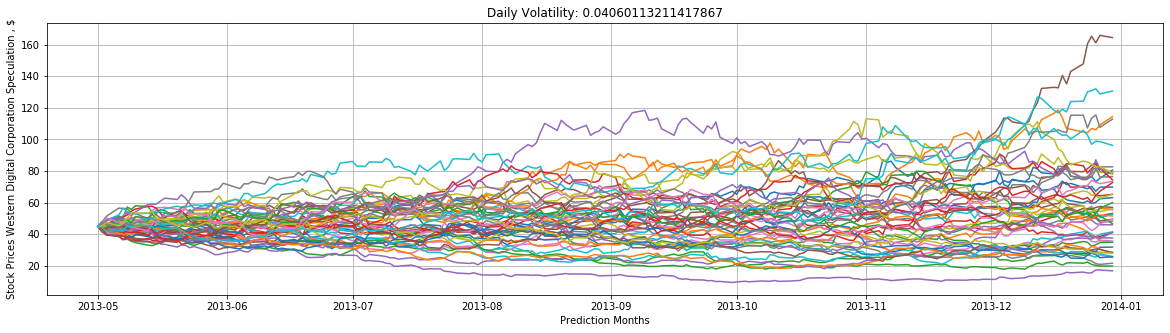

In [46]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC, dimana HGST secara teknis meng-akuisisi STEC Software')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()


#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2013-05-01'
pred_end_date = '2013-12-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '05/1/2013'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC -> HGST Acquire Virident on October 2013**<br>will be plot 7 months

In [47]:
df = pd.DataFrame(get_stock('WDC', '6/1/2013', '1/30/2014'))
df['High'] = get_high('WDC', '6/1/2013', '1/30/2014')
df['Low'] = get_low('WDC', '6/1/2013', '1/30/2014')

In [48]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [49]:
d4 = df
d4_high = df['High']
d4_low = df['Low']
d4_k = df['%K']
d4_d = df['%D']

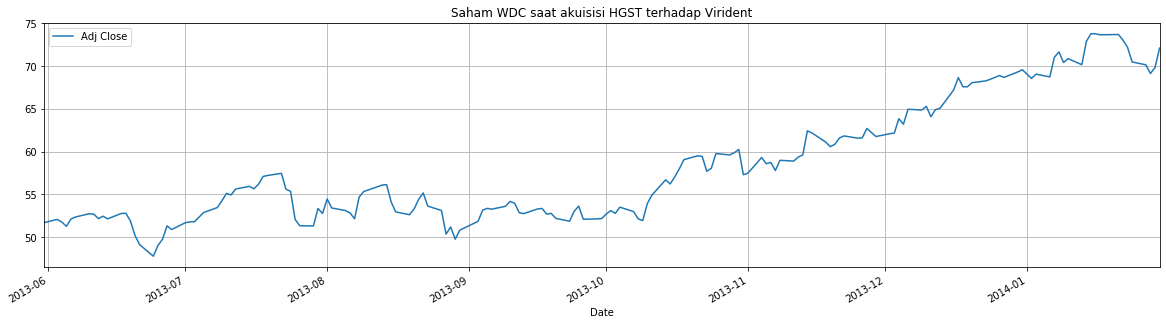

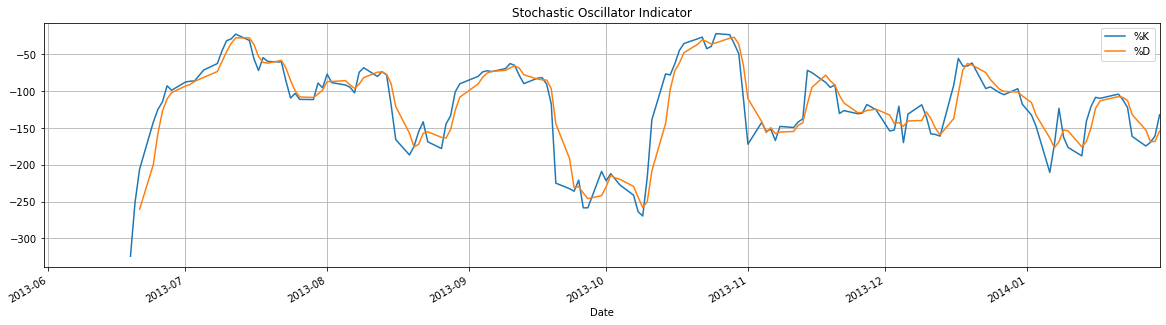

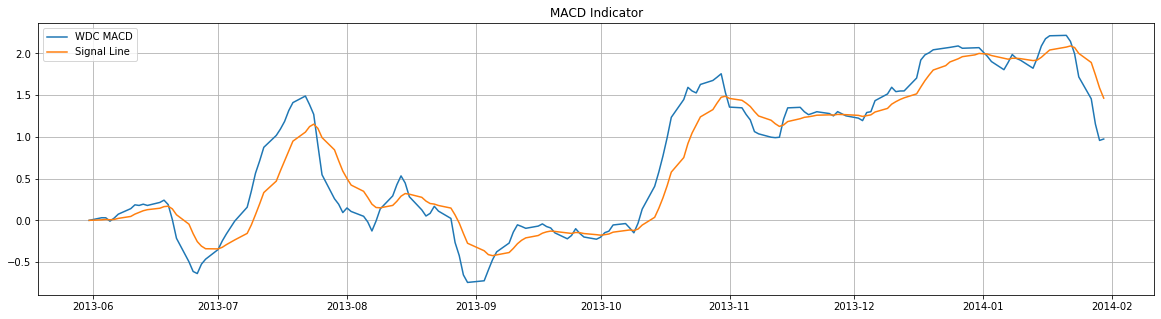

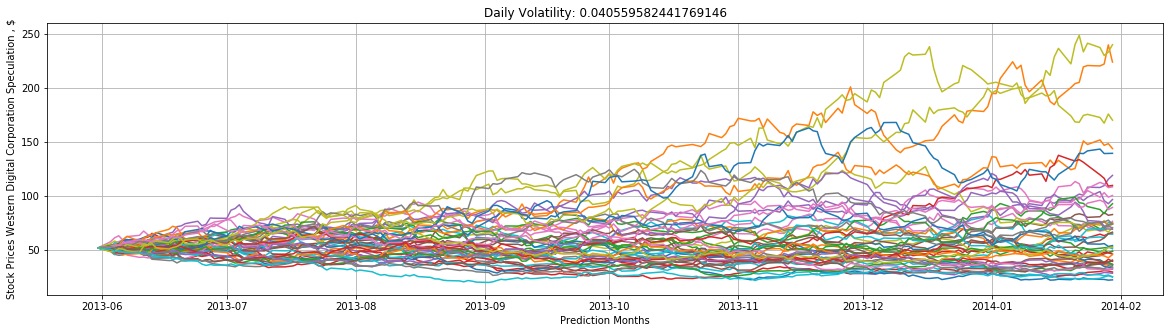

In [50]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi HGST terhadap Virident')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()


#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2013-06-01'
pred_end_date = '2014-1-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '06/1/2013'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC -> HGST Acquire Amplidata on March 2015**<br>will be plot 7 months

In [51]:
df = pd.DataFrame(get_stock('WDC', '11/1/2014', '6/30/2015'))
df['High'] = get_high('WDC', '11/1/2014', '6/30/2015')
df['Low'] = get_low('WDC', '11/1/2014', '6/30/2015')

In [52]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [53]:
d5 = df
d5_high = df['High']
d5_low = df['Low']
d5_k = df['%K']
d5_d = df['%D']

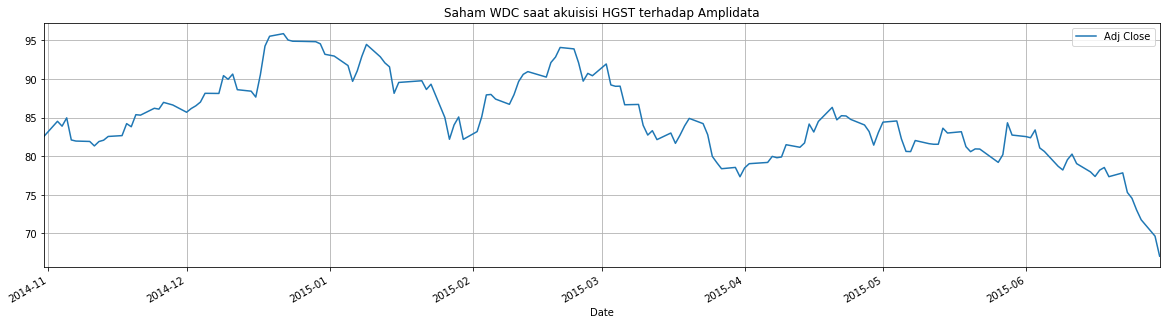

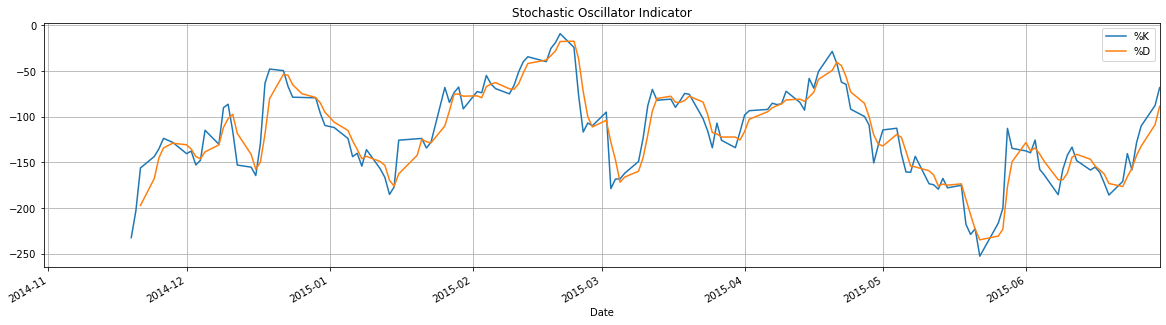

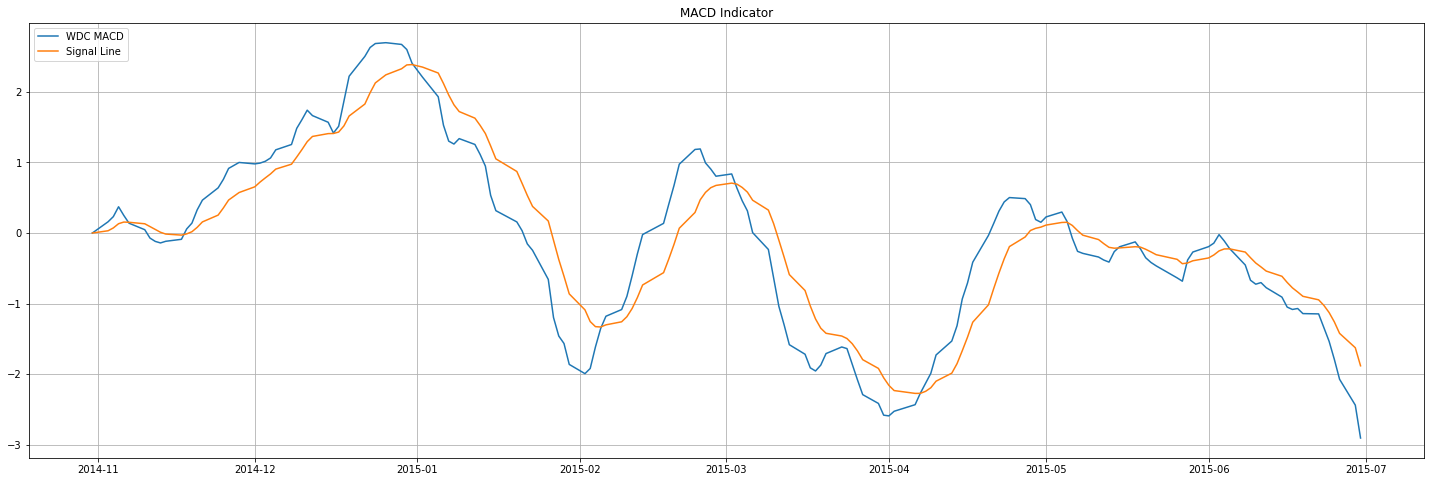

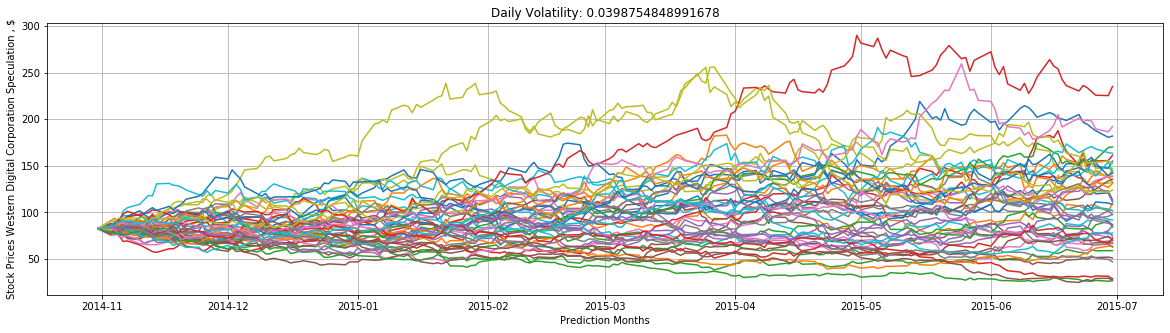

In [54]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi HGST terhadap Amplidata')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(25,8))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()


#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2014-11-01'
pred_end_date = '2015-6-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '11/1/2014'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC Acquire _SanDisk_ on May 2016**<br>will be plot 7 months

In [55]:
df = pd.DataFrame(get_stock('WDC', '1/1/2016', '8/30/2016'))
df['High'] = get_high('WDC', '1/1/2016', '8/30/2016')
df['Low'] = get_low('WDC', '1/1/2016', '8/30/2016')

In [56]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [57]:
d6 = df
d6_high = df['High']
d6_low = df['Low']
d6_k = df['%K']
d6_d = df['%D']

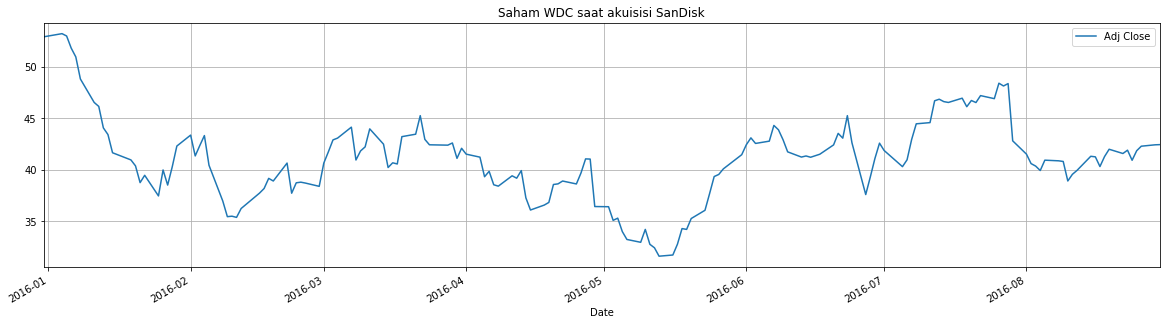

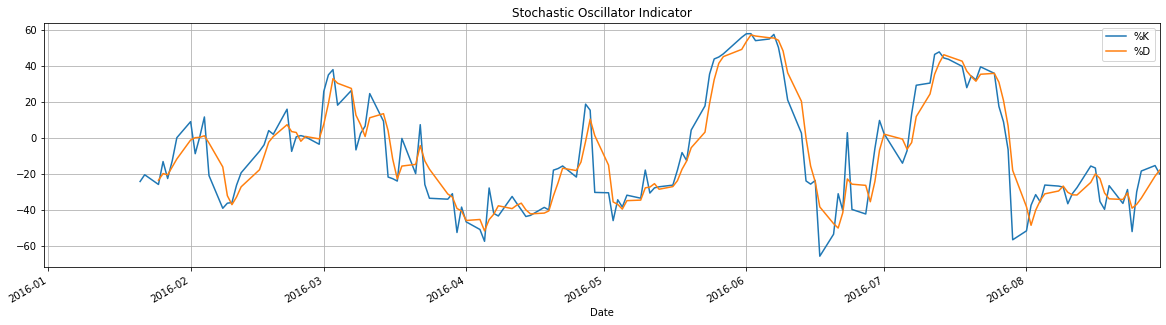

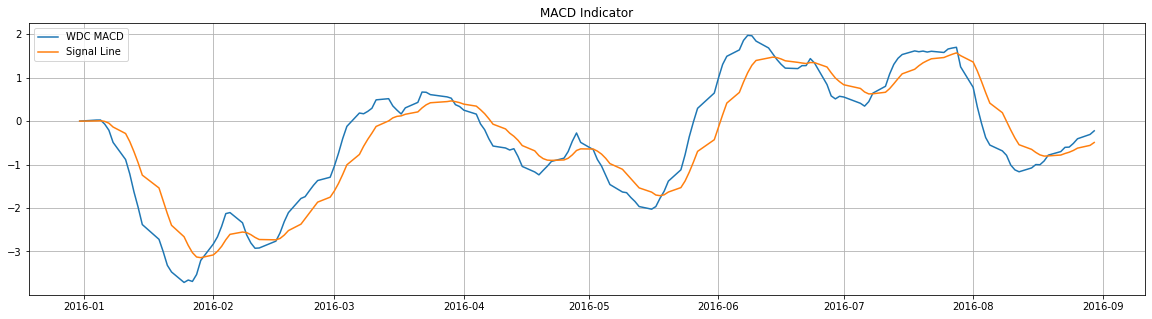

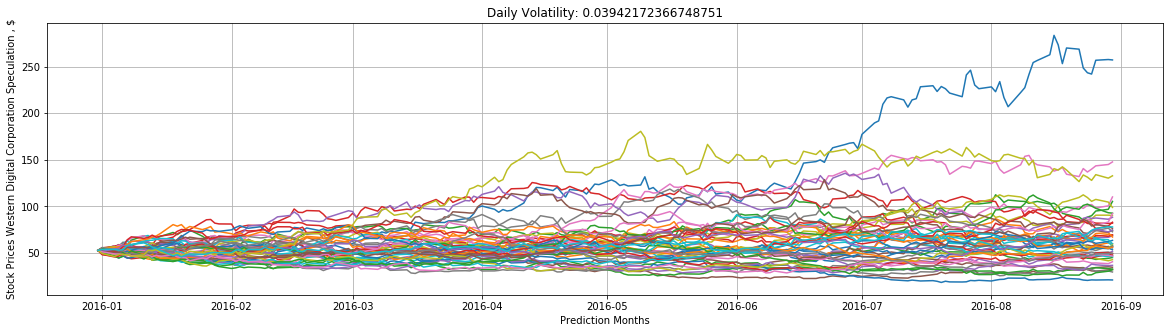

In [58]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi SanDisk')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()


#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2015-12-31'
pred_end_date = '2016-8-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '12/31/2015'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC Acquire Upthere on August 2017**<br>will be plot 7 months

In [59]:
df = pd.DataFrame(get_stock('WDC', '4/1/2017', '11/30/2017'))
df['High'] = get_high('WDC', '4/1/2017', '11/30/2017')
df['Low'] = get_low('WDC', '4/1/2017', '11/30/2017')

In [60]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [61]:
d7 = df
d7_high = df['High']
d7_low = df['Low']
d7_k = df['%K']
d7_d = df['%D']

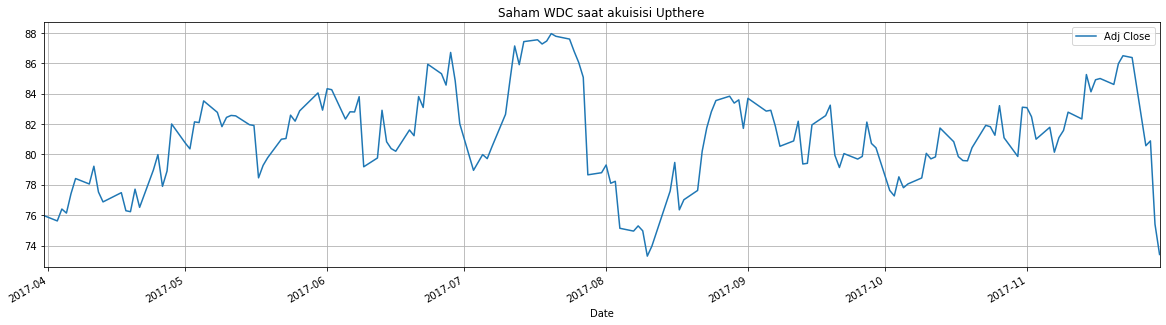

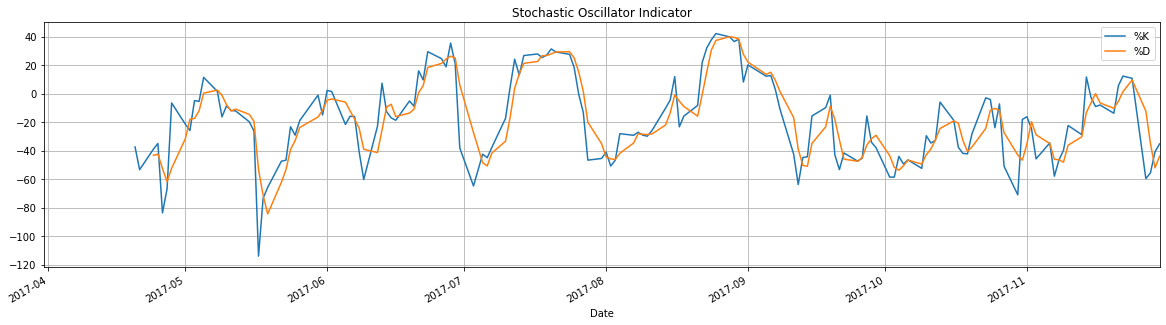

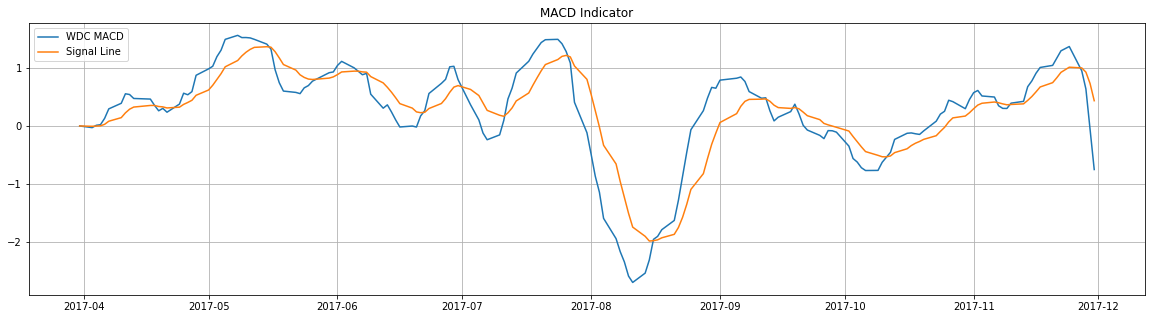

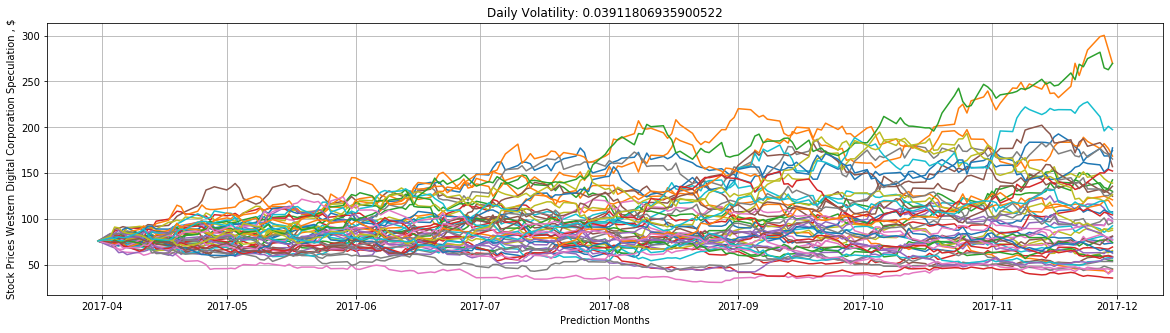

In [62]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi Upthere')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2017-04-01'
pred_end_date = '2017-11-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '04/1/2017'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

## **WDC Acquire Tegile on September 2017**<br>will be plot 7 months

In [63]:
df = pd.DataFrame(get_stock('WDC', '5/1/2017', '12/30/2017'))
df['High'] = get_high('WDC', '5/1/2017', '12/30/2017')
df['Low'] = get_low('WDC', '5/1/2017', '12/30/2017')

In [64]:
df['%K'] = STOK(df['Adj Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Adj Close'], df['Low'], df['High'], 14)

In [65]:
d8 = df
d8_high = df['High']
d8_low = df['Low']
d8_k = df['%K']
d8_d = df['%D']

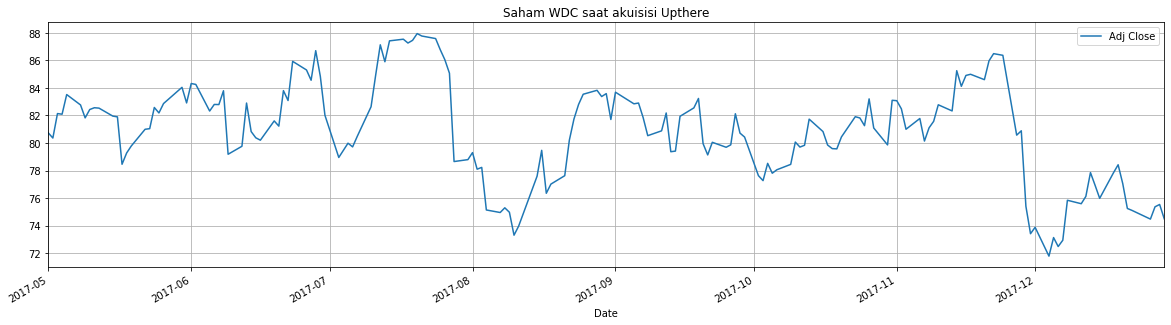

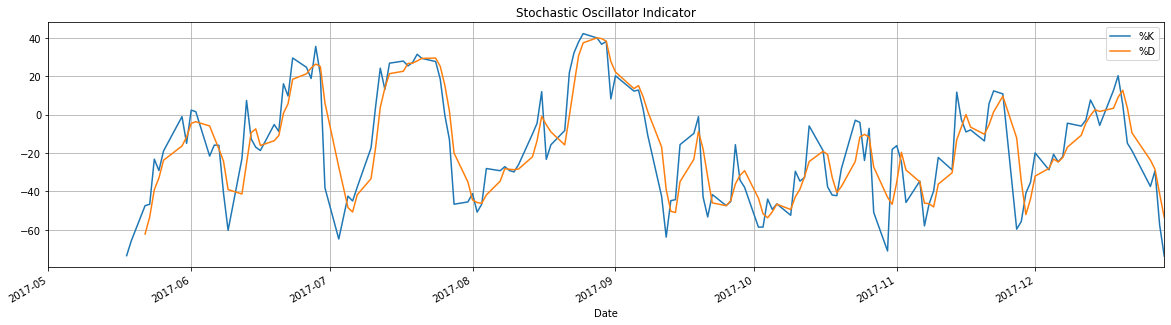

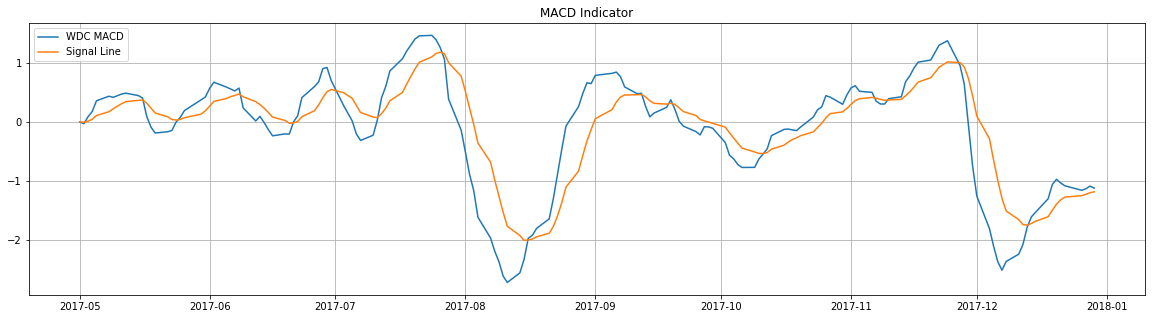

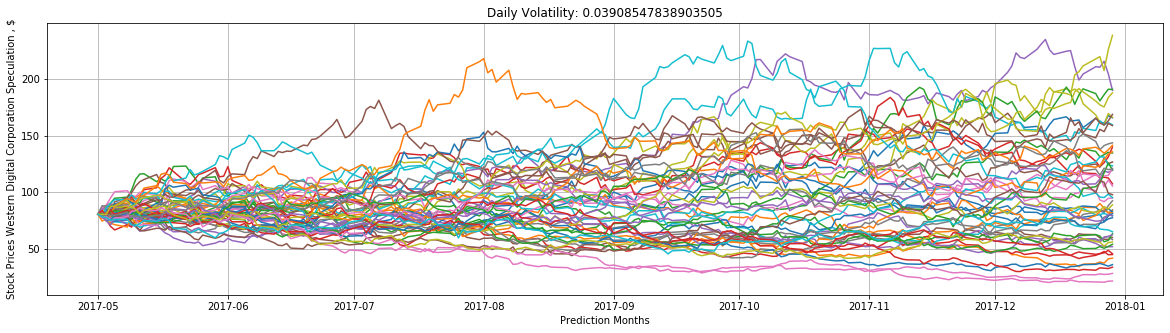

In [66]:
df.plot(y=['Adj Close'], figsize = (20, 5),title='Saham WDC saat akuisisi Upthere')
plt.grid()
df.plot(y=['%K', '%D'], figsize = (20, 5),title='Stochastic Oscillator Indicator')
plt.grid()
plt.show()


df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(20,5))
plt.title('MACD Indicator')
plt.plot(df.ds, macd, label='WDC MACD')
plt.plot(df.ds, exp3, label='Signal Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#GEOMETRIC BROWNIAN MOTION
start_date = '1978-12-31'
end_date = '2017-05-01'
pred_end_date = '2017-12-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/1978', '05/1/2017'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,5))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()

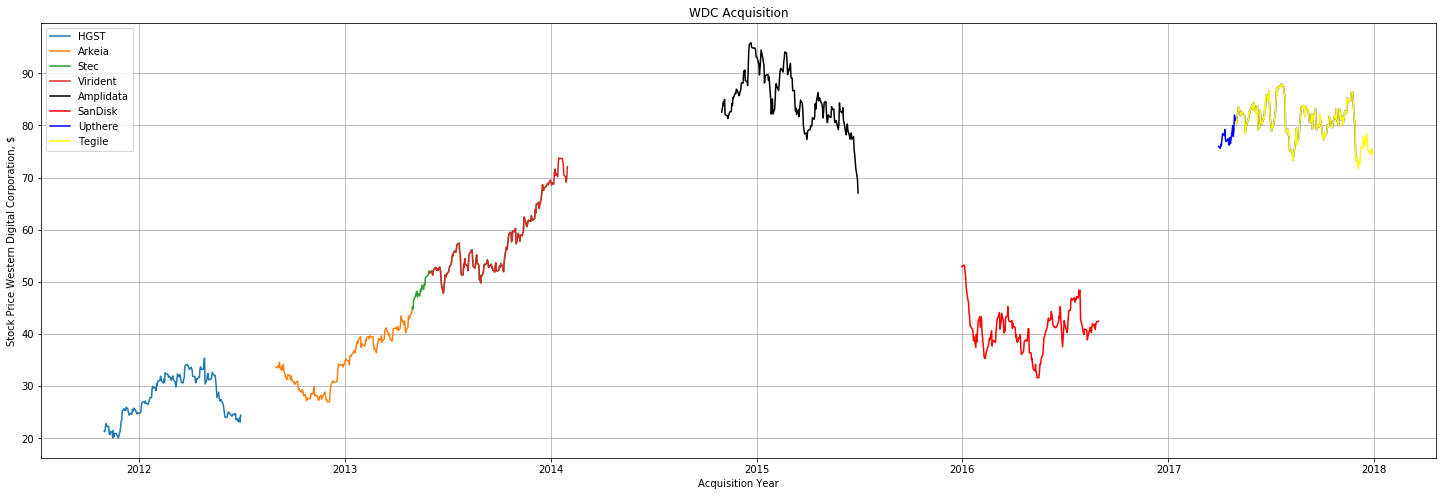

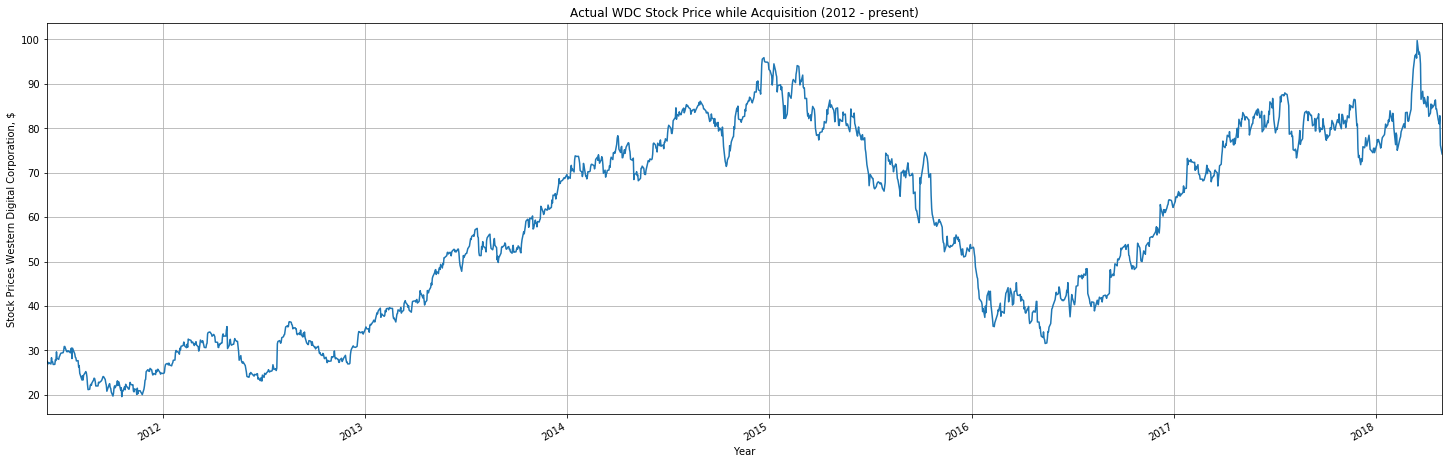

In [67]:
%matplotlib inline
# d1.plot(y=['Adj Close'],title='HGST')
# d1.plot(y=['%K', '%D'], title='Stochastic Oscillator') 
# d2.plot(y=['Adj Close'],title='Arkeia')
# d2.plot(y=['%K', '%D'], title='Stochastic Oscillator')
plt.figure(figsize=(25,8))
plt.title('WDC Acquisition')
plt.plot(d1['Adj Close'], label='HGST')
plt.plot(d2['Adj Close'], label='Arkeia')
plt.plot(d3['Adj Close'], label='Stec')
plt.plot(d4['Adj Close'], label='Virident')
plt.plot(d5['Adj Close'], label='Amplidata',color='black')
plt.plot(d6['Adj Close'], label='SanDisk', color="red")
plt.plot(d7['Adj Close'], label='Upthere',color='blue')
plt.plot(d8['Adj Close'], label='Tegile',color='yellow')
plt.ylabel('Stock Price Western Digital Corporation, $')
plt.xlabel('Acquisition Year')
plt.legend()
plt.grid()
plt.show()


df0 = pd.DataFrame(get_stock('WDC', '6/6/2011', '4/30/2018'))
pylab.rcParams['figure.figsize'] = (25, 8)  

df0["Adj Close"].plot(grid = True)
plt.title('Actual WDC Stock Price while Acquisition (2012 - present)')
plt.xlabel('Year')
plt.ylabel('Stock Prices Western Digital Corporation, $')
plt.show()

## **Speculation & Prediction on WDC Stock Price (in the next semester)**

In [68]:
#GEOMETRIC BROWNIAN MOTION
start_date = '2011-12-31'
end_date = '2019-12-11'
pred_end_date = '2020-7-30'

from pandas_datareader import data as web
def get_stock(stock,start,end):
 return web.DataReader(stock,'yahoo',start,end)['Adj Close']
df = pd.DataFrame(get_stock('WDC', '12/31/2011', '12/11/2019'))

df = df[['Adj Close']]
df.reset_index(level=0, inplace=True)

returns = (df.loc[1:, 'Adj Close'] - \
df.shift(1).loc[1:, 'Adj Close']) / \
df.shift(1).loc[1:, 'Adj Close']

So = df.loc[df.shape[0] - 1, "Adj Close"]

dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
    format = "%Y-%m-%d") + pd.Timedelta('1 days'),
    end = pd.to_datetime(pred_end_date,
    format = "%Y-%m-%d")).to_series().map(lambda x:
    1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

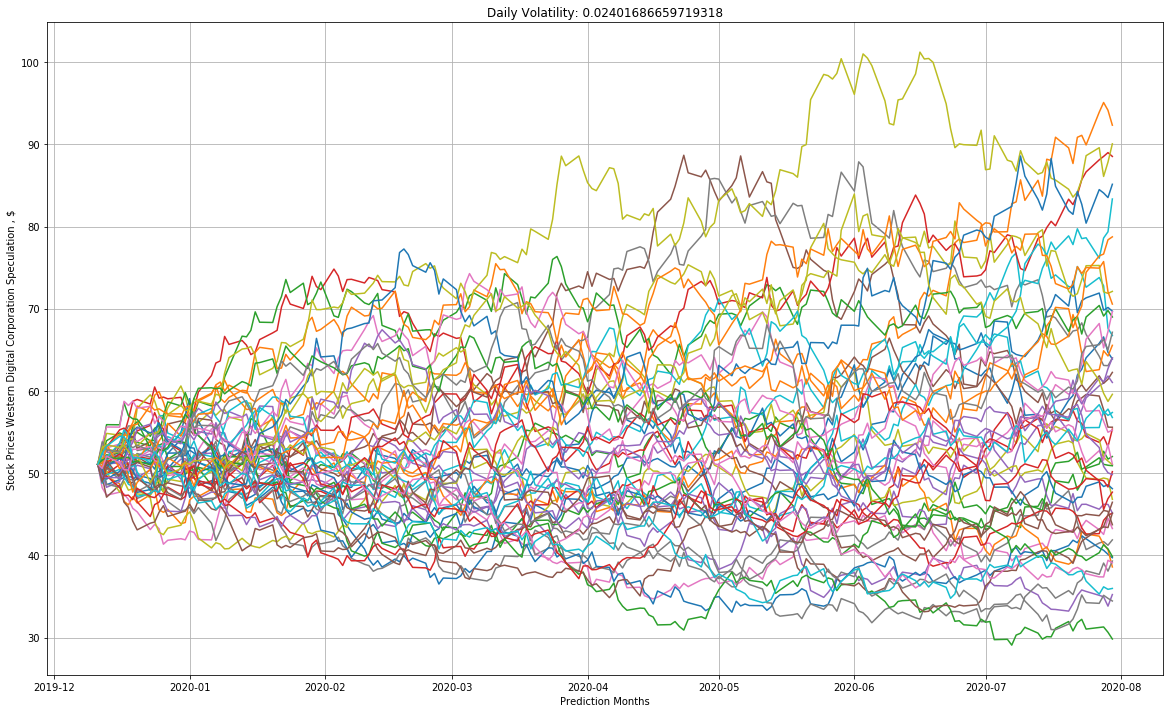

In [69]:
# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print(drift)

diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
plt.figure(figsize = (20,12))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = df["Date"].max(),
    end = pred_end_date, freq = 'D').map(lambda x:
    x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices Western Digital Corporation Speculation , $')
    plt.xlabel('Prediction Months')
plt.grid()
plt.show()